In [1]:
import io
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import tensorflow as tf

In [2]:
import loss_functions as lf

In [3]:
class ModelPrediction():
    
    def __init__(self,file_path,file_format,folder_name):
        self.file_path = file_path
        self.file_format = file_format
        self.folder_name = folder_name
        
    def process_image(self):
        file_path = os.path.join('dataset',f'{self.folder_name}',f'{self.file_path}.{self.file_format}')
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = tf.image.resize(image,(128,128))/255
        image = tf.expand_dims(image, axis=0)
        self.image = image
    
    def prediction(self):
        load_model = tf.keras.models.load_model('braintumor_model.h5',
                                               custom_objects={'iou':lf.iou,
                                                               'dice_coefficient':lf.dice_coefficient,
                                                               'dice_coefficient_loss':lf.dice_coefficient_loss})
        
        pred = load_model.predict(self.image)
        pred = np.squeeze(pred,axis=0)
        self.pred = pred
        #plt.imshow(pred)
        
    def plot_graph(self):
        plt.figure(figsize=(12,12))
        plt.subplot(1,2,1)
        plt.imshow(np.squeeze(self.image,axis=0))
        plt.title('True Image')
        plt.subplot(1,2,2)
        plt.imshow(self.pred)
        plt.title('predicted Mask')



In [4]:
'TCGA_DU_5851_19950428_15'

'TCGA_DU_5851_19950428_15'

1/1 [==============================] - 3s 3s/step


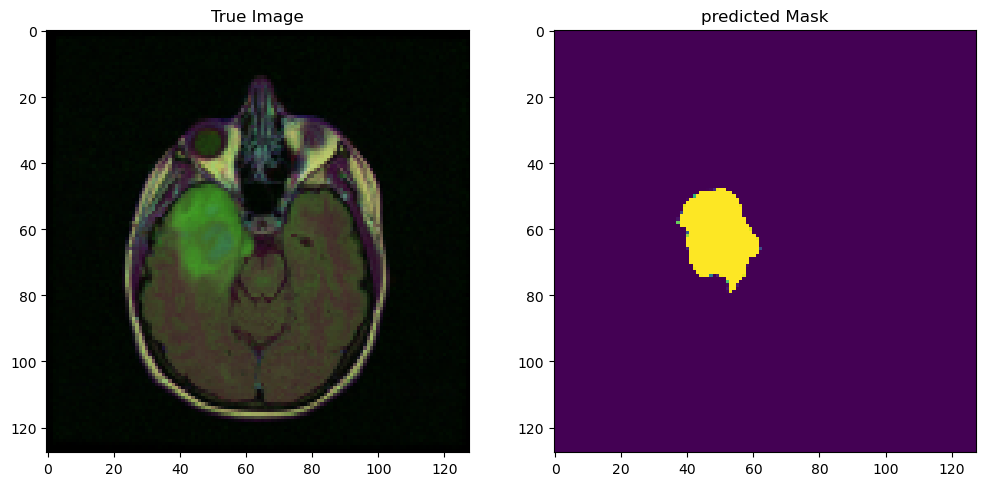

In [5]:
model = ModelPrediction('TCGA_DU_5851_19950428_15', file_format='tif',folder_name='image')
model.process_image()
model.prediction()
result = model.plot_graph()

## Test image

1/1 [==============================] - 0s 195ms/step


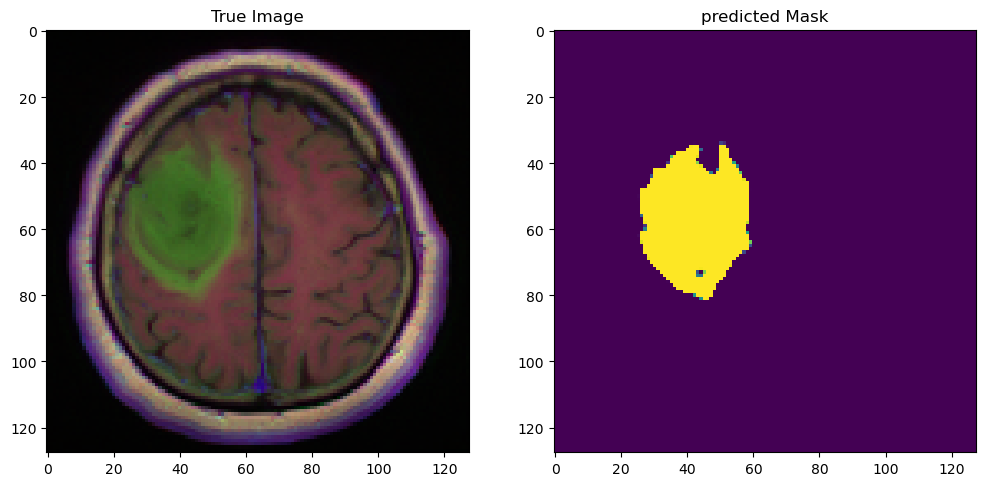

In [6]:
model = ModelPrediction('hey', file_format='png',folder_name='test_image')
model.process_image()
model.prediction()
result = model.plot_graph()